<a href="https://colab.research.google.com/github/MrCat2357/Principios-de-Imageamento-Digital/blob/main/Filtro_Laplaciano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

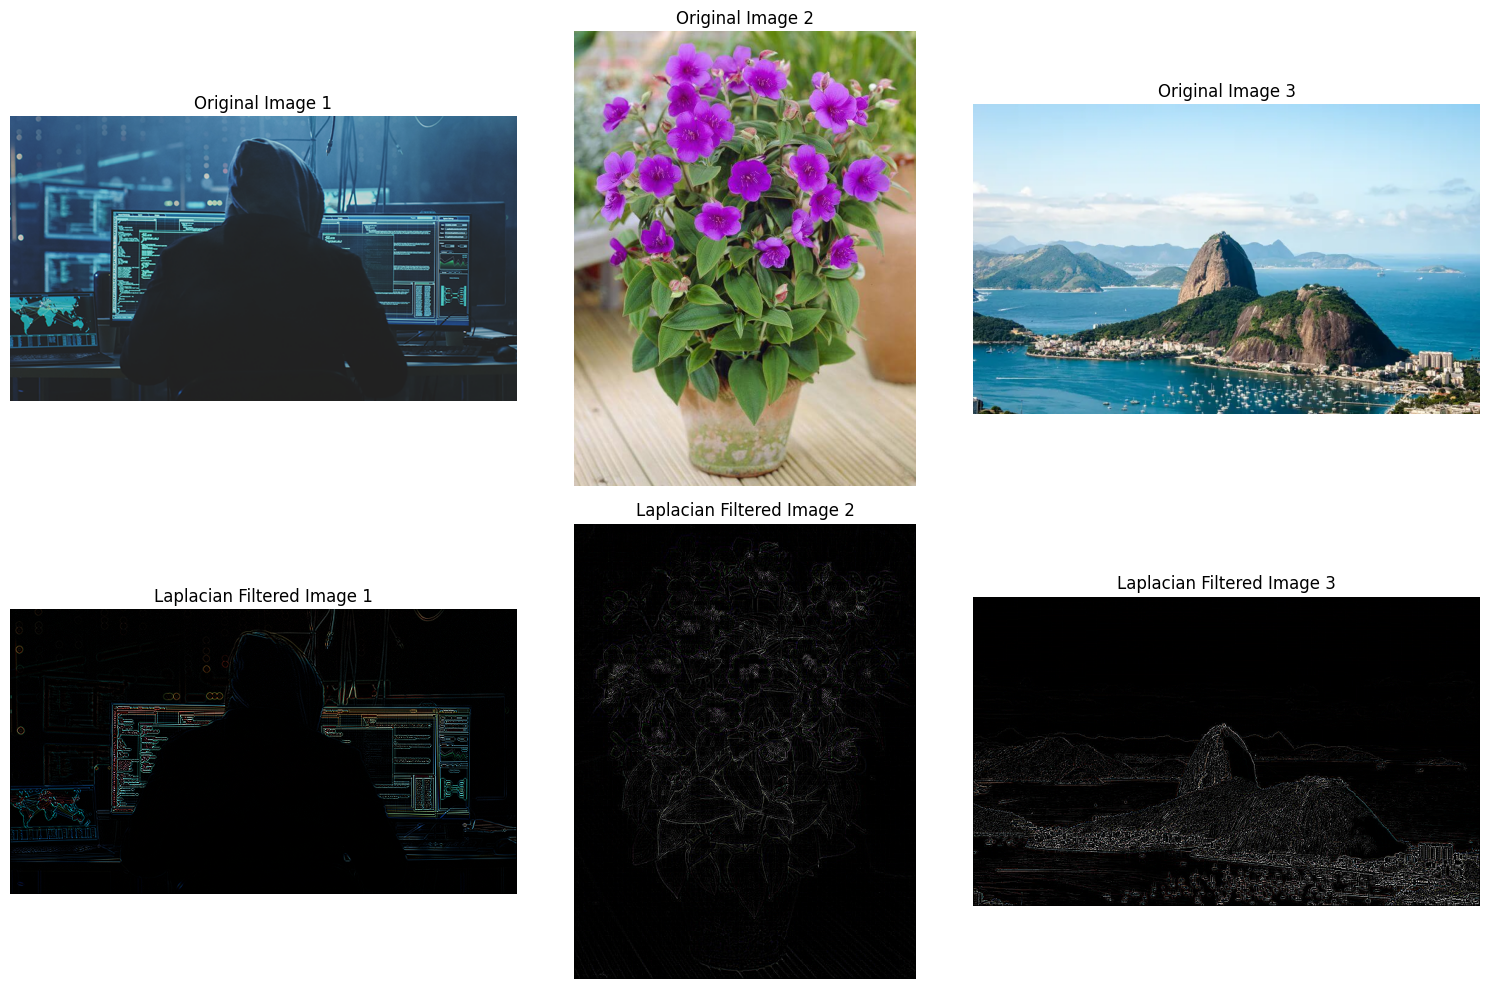

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def apply_laplacian_filter(image):
    height, width, channels = image.shape
    filtered_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Máscara do filtro Laplaciano
    laplacian_mask = np.array([[0, 1, 0],
                               [1, -4, 1],
                               [0, 1, 0]])

    # Percorre a imagem aplicando o filtro Laplaciano
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            for k in range(channels):
                total = 0
                for m in range(-1, 2):
                    for n in range(-1, 2):
                        total += image[i + m, j + n, k] * laplacian_mask[m + 1, n + 1]
                filtered_image[i, j, k] = np.clip(total, 0, 255)

    return filtered_image

# Carregar as imagens corretamente
imagens = []
for i in range(1, 4):
    image_path = f"imagem{i}.png"
    imagem = cv2.imread(image_path)
    if imagem is not None:
        imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)  # Converte de BGR para RGB
        imagens.append(imagem)
    else:
        print(f"Erro ao carregar a imagem {image_path}.")

# Aplica o filtro Laplaciano em cada imagem
filtered_images = [apply_laplacian_filter(imagem) for imagem in imagens]

# Plota as imagens originais e filtradas
plt.figure(figsize=(15, 10))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(imagens[i])
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.imshow(filtered_images[i])
    plt.title(f'Laplacian Filtered Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()